<a href="https://colab.research.google.com/github/salbora1373/dk-sr-project/blob/main/Task_for_DK_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raw data loaded: 61625 rows
Successfully parsed records: 61624
Normalized DataFrame shape: (61624, 14)
Columns: ['trip_id', 'end_time', 'coordinates', 'vehicle_type', 'accuracy', 'trip_distance', 'propulsion_types', 'SID', 'start_time', 'timestamps_list', 'trip_duration', 'vehicle_id', 'timestamp', '_headers.eventType']


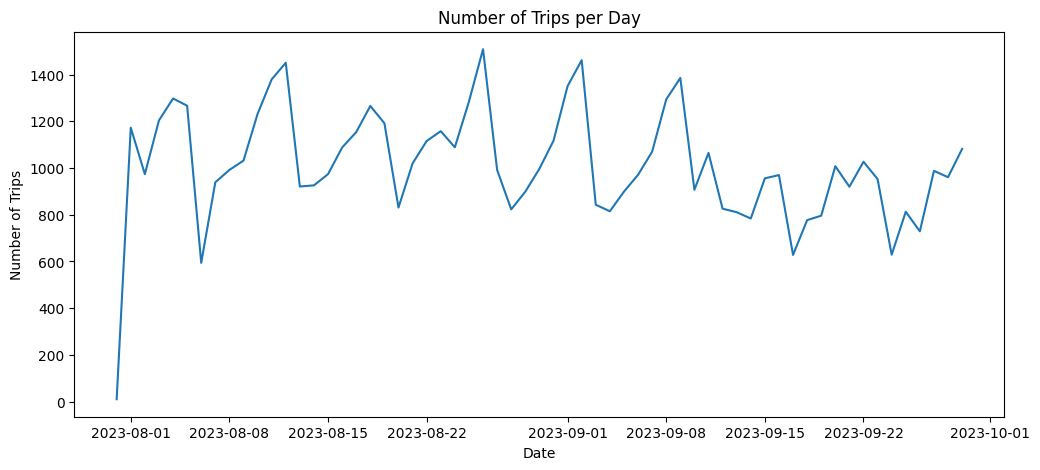

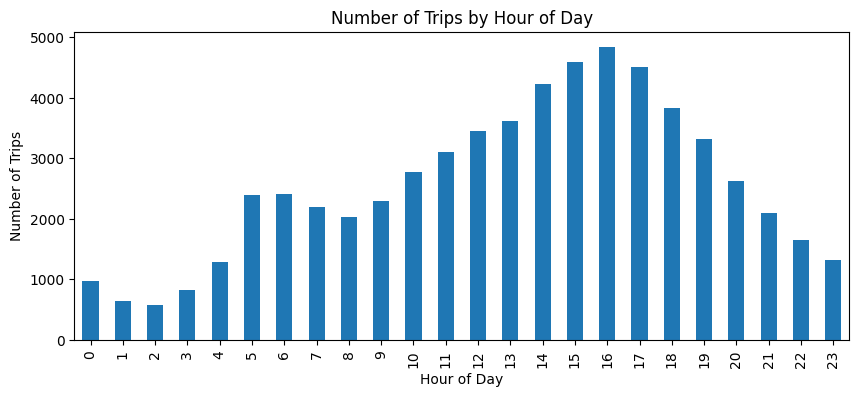

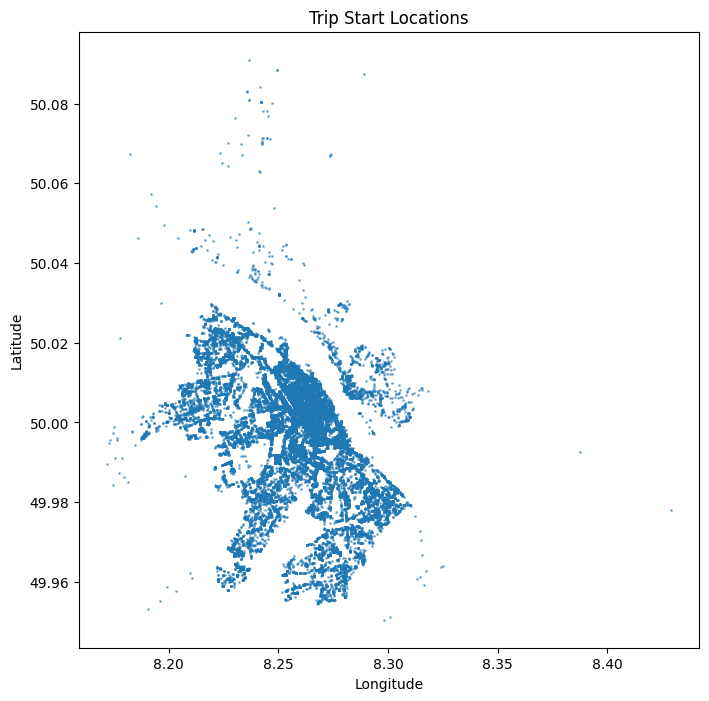

Insights:
- Total trips analyzed: 61624
- Date range: 2023-07-31 to 2023-09-29
- Peak trip hour: 16 with 4846 trips
- Approximate start location centroid: (49.99766, 8.25960)


In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# PLEASE CHANGE THIS VARIABLE TO SET THE PATH TO THE LOCAL FILE
#I'm saving it to my Google Drive
filepath = 'drive/MyDrive/Data_Set/bike_data.csv'

# Load file and get only the index and data
# sensordata -> data
df_raw = pd.read_csv(filepath, header=None, names=['index', 'data'], skip_blank_lines=True)

print(f"Raw data loaded: {len(df_raw)} rows")
# The file contain srting version of dictionaries so i needed to covert them to real dictionaries
# In case some rows are malformed, the eception part will remove them.
def safe_parse(row):
    try:
        return ast.literal_eval(row)
    except:
        return None
# Create another row to prevent overwriting of the column.
df_raw['parsed'] = df_raw['data'].apply(safe_parse)

# If an error occurs, then remove malformed data from the 'parsed' column.
df_parsed = df_raw.dropna(subset=['parsed'])
print(f"Successfully parsed records: {len(df_parsed)}")

# Step 3: Convert these rows to readable JSON.
df = pd.json_normalize(df_parsed['parsed'])

print(f"Normalized DataFrame shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Step 4: Convert timestamps to human readable datetime
df['start_time'] = pd.to_datetime(df['start_time'], unit='ms')
df['end_time'] = pd.to_datetime(df['end_time'], unit='ms')

# Step 5: Analyze 'when' — Trips per day/hour
df['trip_date'] = df['start_time'].dt.date
df['trip_hour'] = df['start_time'].dt.hour

# Plot trips per day
trips_per_day = df.groupby('trip_date').size()
plt.figure(figsize=(12,5))
trips_per_day.plot(title='Number of Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Plot trips per hour
trips_per_hour = df.groupby('trip_hour').size()
plt.figure(figsize=(10,4))
trips_per_hour.plot(kind='bar', title='Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


# example: [[0,0], [1,1]] gets converted to :
# [0,0] in start_longitude and [1,1] in start_latitude
df['start_longitude'] = df['coordinates'].apply(lambda x: x[0][0] if isinstance(x, list) and len(x) > 0 else None)
df['start_latitude'] = df['coordinates'].apply(lambda x: x[0][1] if isinstance(x, list) and len(x) > 0 else None)

# data cleaning: if some rows don't have this, remove.
df_coords = df.dropna(subset=['start_longitude', 'start_latitude'])

# Plot start locations on a scatter plot
plt.figure(figsize=(8,8))
plt.scatter(df_coords['start_longitude'], df_coords['start_latitude'], s=1, alpha=0.5)
plt.title('Trip Start Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 7: Print key Infos
print("Insights:")
print(f"- Total trips analyzed: {len(df)}")
print(f"- Date range: {df['trip_date'].min()} to {df['trip_date'].max()}")
print(f"- Peak trip hour: {trips_per_hour.idxmax()} with {trips_per_hour.max()} trips")
print(f"- Approximate start location centroid: ({df_coords['start_latitude'].mean():.5f}, {df_coords['start_longitude'].mean():.5f})")


In [6]:
import pandas as pd

# File path on your mounted Google Drive
filepath = 'drive/MyDrive/Data_Set/bike_data.csv'

# Step 1: Load the raw CSV with no header, as each row is a dict string
df_raw = pd.read_csv(filepath, header=None, names=['index', 'data', "trip_duration"], skip_blank_lines=True)
# Step 2: Parse each row string safely into dict (skip lines causing errors)
def safe_parse(row):
    try:
        return ast.literal_eval(row)
    except:
        return None
# None
df_raw['parsed'] = df_raw['data'].apply(safe_parse)
print(df_raw["parsed"])
print("--------------before json ------------")
df = pd.json_normalize(df_parsed['parsed'])
print(df)

0                                                     None
1        {'trip_id': '439f9229-2784-4338-9773-d652c9e56...
2        {'trip_id': 'c55453e0-b755-4158-9d78-d333097ec...
3        {'trip_id': '916c12fa-965e-4902-a92f-e48049440...
4        {'trip_id': '62efe364-30f4-4f48-b80a-d6c193dcd...
                               ...                        
61620    {'trip_id': 'e57b8a1c-536c-4e06-b30e-0b90b7cbb...
61621    {'trip_id': '2b367c65-b8a5-4675-b342-6d9a4461e...
61622    {'trip_id': '6db5b6ce-94f6-41aa-af9a-b28cf678e...
61623    {'trip_id': '34acd706-5711-4b48-8354-e874b0515...
61624    {'trip_id': 'f6aa2f26-2434-4055-82c5-88e76356e...
Name: parsed, Length: 61625, dtype: object
--------------before json ------------
                                    trip_id       end_time  \
0      439f9229-2784-4338-9773-d652c9e568cc  1690844643510   
1      c55453e0-b755-4158-9d78-d333097ecb45  1690845074877   
2      916c12fa-965e-4902-a92f-e4804944093b  1690847157514   
3      62efe364-30f4-

In [5]:
person = {"name": "Aly"}
print(person['name'])
person["name"] = "Hussain"
print(person['name'])




Aly
Hussain
